In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [13]:
 #Reading in the fulfilment file 
fulfillment_data = pd.read_csv('fulfilment_center_info.csv')
fulfillment_data.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [14]:
#Reading in the meal info file  
meal_data = pd.read_csv('meal_info.csv')
meal_data.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [15]:
#Reading in the train file 
main_data = pd.read_csv('train.csv')
main_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [16]:
#Merging the datasets
merge_1 = pd.merge(left = main_data, right = meal_data, how = 'left', left_on = ['meal_id'], right_on = ['meal_id'])
merge_2 = pd.merge(left = merge_1, right = fulfillment_data, how = 'left', left_on = ['center_id'], right_on = ['center_id'])
merge_2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


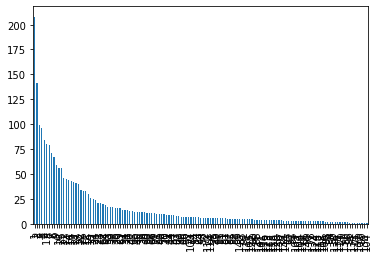

In [17]:
main_data = merge_2.copy(deep = True)
nweeks = main_data.groupby(['meal_id', 'center_id'])['week'].count().reset_index().rename(columns = {'week': "#weeks_available"}).sort_values('#weeks_available')
nweeks_missing = nweeks[nweeks['#weeks_available']!=145]
missing_data = nweeks_missing[nweeks_missing['#weeks_available'] == 144]
nweeks_missing['#weeks_missing'] = 145 - nweeks_missing['#weeks_available']
nweeks_missing['#weeks_missing'].value_counts().plot(kind = 'bar')

In [18]:
main_data.sort_values(['meal_id', 'center_id'], inplace = True)

In [19]:
main_data.shape

(456548, 15)

In [ ]:
meal_center_list = nweeks_missing[['meal_id', 'center_id']].values.tolist()

flag = 0
for item in meal_center_list:
    for i in range(145):
        if ((main_data['meal_id'] == item[0]) & (main_data['center_id'] == item[1]) & (main_data['week'] == i+1)).any():
            continue
        else:
            data = [{'week':i+1,'center_id':item[1], 'meal_id':item[0],
               'checkout_price': main_data.loc[((main_data['meal_id'] == item[0]) & (main_data['center_id'] == item[1])), 'checkout_price'].mean(), 
               'base_price': main_data.loc[((main_data['meal_id'] == item[0]) & (main_data['center_id'] == item[1])), 'base_price'].mean(),
              'emailer_for_promotion': 0, 'homepage_featured': 0, 'num_orders': 0, 
                'category': main_data.loc[((main_data['meal_id'] == item[0]) & (main_data['center_id'] == item[1])), 'category'].values[0],
          'cuisine': main_data.loc[((main_data['meal_id'] == item[0]) & (main_data['center_id'] == item[1])), 'cuisine'].values[0],
          'city_code': main_data.loc[((main_data['meal_id'] == item[0]) & (main_data['center_id'] == item[1])), 'city_code'].values[0],
          'region_code': main_data.loc[((main_data['meal_id'] == item[0]) & (main_data['center_id'] == item[1])), 'region_code'].values[0],
          'center_type': main_data.loc[((main_data['meal_id'] == item[0]) & (main_data['center_id'] == item[1])), 'center_type'].values[0],
          'op_area': main_data.loc[((main_data['meal_id'] == item[0]) & (main_data['center_id'] == item[1])), 'op_area'].values[0]}]
            main_data = main_data.append(data,ignore_index=True,sort=False)
  

In [ ]:
# Write the imputed data to csv for later use
main_data.to_csv('Imputed_data.csv', header = False)

In [4]:
# Reading in the imputed data 
main_data = pd.read_csv('imputed_data.csv')
main_data.shape

(521565, 14)

## Exploratory Data Analysis

In [5]:
#emptycolumns
main_data.isna().sum()

week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [6]:
main_data.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000,521565.000000
mean,73.000000,82.313595,2030.017793,342.247748,364.508958,0.071036,0.095587,229.228351,601.531554,56.621907,4.023186
std,41.856939,45.873564,547.374132,154.093264,161.800386,0.256886,0.294025,380.390839,66.142150,17.740476,1.106864
min,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,0.000000,456.000000,23.000000,0.900000
25%,37.000000,43.000000,1558.000000,240.620000,249.320000,0.000000,0.000000,28.000000,553.000000,34.000000,3.500000
50%,73.000000,76.000000,1993.000000,308.490000,319.130000,0.000000,0.000000,108.000000,596.000000,56.000000,4.000000
75%,109.000000,110.000000,2539.000000,447.230000,478.326000,0.000000,0.000000,284.000000,651.000000,77.000000,4.500000
max,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


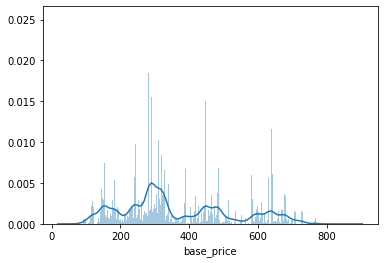

In [7]:
sns.distplot(main_data['base_price'].dropna(), bins=500)
plt.show()

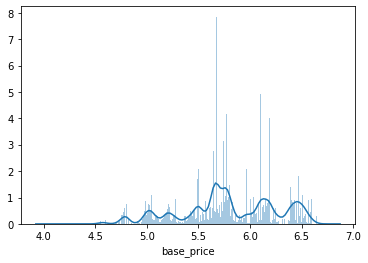

In [8]:
sns.distplot(np.log1p(main_data['base_price']).dropna(), bins=500)
plt.show()

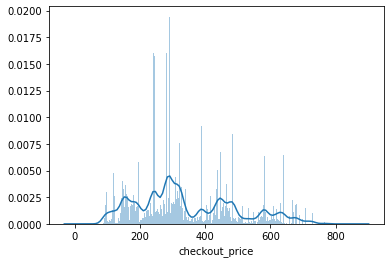

In [9]:
sns.distplot(main_data['checkout_price'].dropna(), bins=500)
plt.show()

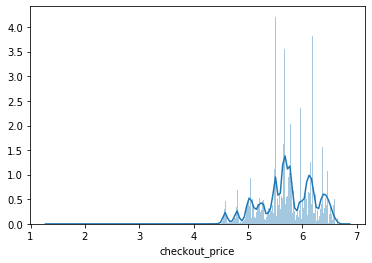

In [10]:
sns.distplot(np.log1p(main_data['checkout_price'].dropna()), bins=500)
plt.show()

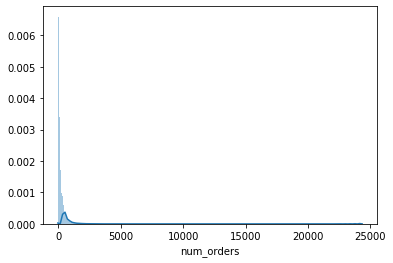

In [11]:
sns.distplot(main_data['num_orders'].dropna(), bins=500)
plt.show()

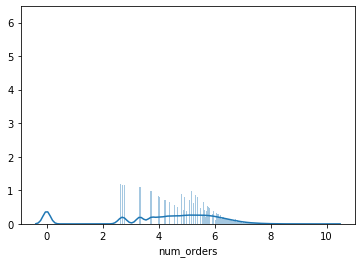

In [12]:
sns.distplot(np.log1p(main_data['num_orders'].dropna()), bins=500)
plt.show()

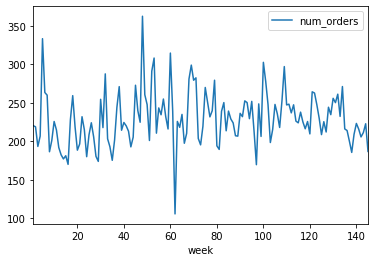

In [13]:
main_data.groupby(['week'])['num_orders'].mean().reset_index().plot(x = 'week', y = 'num_orders')

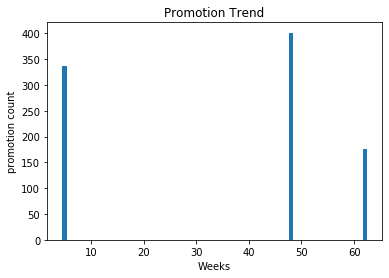

In [14]:
#plot of promotional activities for week 5, 48 and 62
df_week_62 = main_data[main_data.week == 62]
df_week_48 = main_data[main_data.week == 48]
df_week_5 = main_data[main_data.week == 5]

week_62 = df_week_62.emailer_for_promotion.value_counts()
aa = int(week_62[week_62.index ==1].values)

week_48 = df_week_48.emailer_for_promotion.value_counts()
bb = int(week_48[week_48.index ==1].values)

week_5 = df_week_5.emailer_for_promotion.value_counts()
cc = int(week_5[week_5.index ==1].values)

l = [cc,bb,aa]
w = [5,48,62]
plt.bar(w,l)
plt.title("Promotion Trend")
plt.xlabel("Weeks")
plt.ylabel("promotion count")

plt.savefig('promotion_per_week.png', bbox_inches='tight')
plt.show()

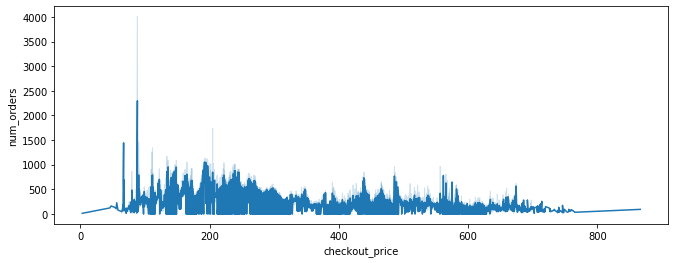

In [15]:
#plot of check_out price vs number of orders
fig=plt.figure(figsize=(11,4))
sns.lineplot(main_data['checkout_price'],main_data['num_orders'])
plt.savefig('num_order_va_checkout_price.png', bbox_inches='tight')

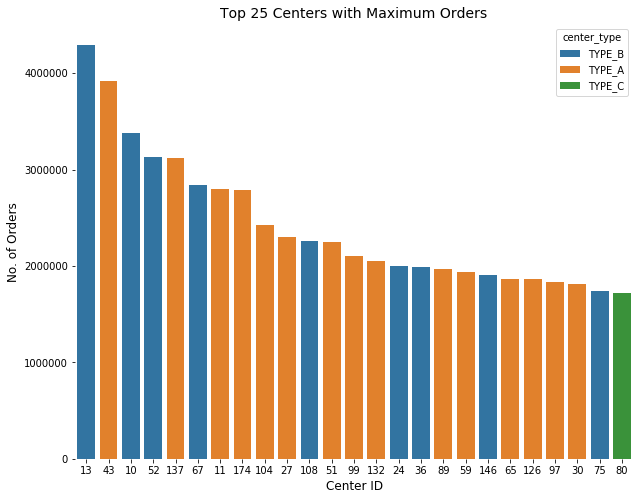

In [16]:
# plot of top 25 centers with maximum orders
fig=plt.figure(figsize=(10,8))
plt.title('Top 25 Centers with Maximum Orders',fontdict={'fontsize':14})
barlist = sns.barplot(y='num_orders', x='center_id', data=main_data.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(25),hue='center_type',order=list(main_data.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(25)['center_id']),dodge=False);
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True)
fig = barlist.get_figure()
fig.savefig('Top25_center_with_highest_order.png', bbox_inches='tight')

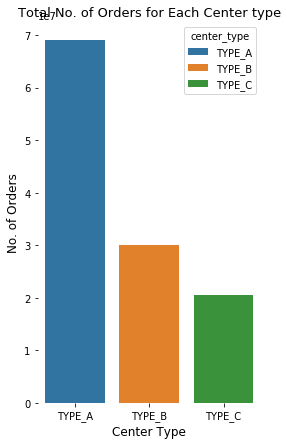

In [17]:
#plot of number of orders per center_type
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Orders for Each Center type',fontdict={'fontsize':13})
sns.barplot(y='num_orders', x='center_type', data=main_data.groupby('center_type').sum()['num_orders'].reset_index(),hue='center_type',dodge=False);
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True)
plt.savefig('num_orders_per_center.png', bbox_inches='tight')

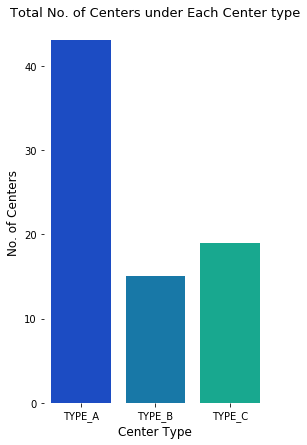

In [18]:
#plot of number of centers per center_type (A,B,C)
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Centers under Each Center type',fontdict={'fontsize':13})
sns.barplot(y=main_data.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts(), x=main_data.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts().index,palette='winter',order=["TYPE_A", "TYPE_B","TYPE_C"]);
plt.ylabel('No. of Centers',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True)
plt.savefig('No.of_centers_per_type.png', bbox_inches='tight')

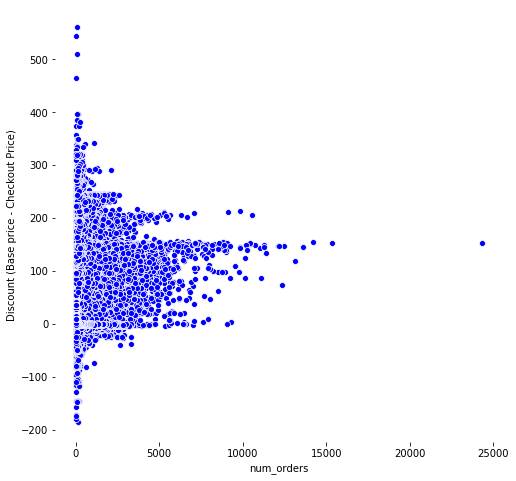

In [19]:
#plot of discount offered per week
plt.figure(figsize=(8,8))
sns.scatterplot(y=main_data['base_price']-main_data['checkout_price'],x=main_data['num_orders'],color='blue')
plt.ylabel('Discount (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)
plt.savefig('discount_vs_num_orders.png', bbox_inches='tight')

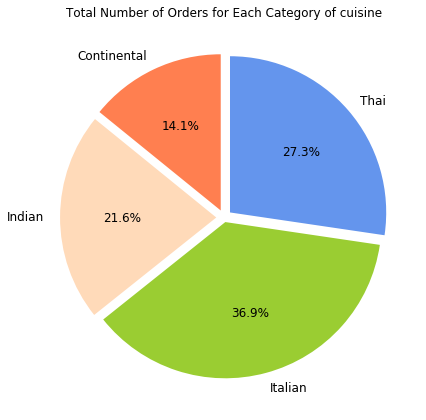

In [20]:
# plot of proportions of different cuisins ordered
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(main_data.groupby(['cuisine']).num_orders.sum(),
labels=main_data.groupby(['cuisine']).num_orders.sum().index,
shadow=False,colors=colors,explode=(0.05, 0.05, 0.03,0.05),startangle=90, autopct='%1.1f%%',pctdistance=0.6,
textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category of cuisine')
plt.tight_layout()
plt.savefig('num_order_per_category_cuisine.png', bbox_inches='tight')
plt.show()

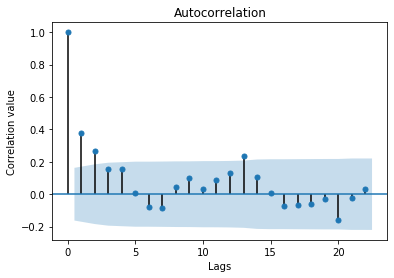

In [29]:
# Auto correlation plot of one meal id - center id combination 
time_slot = main_data[(main_data['meal_id'] == 1062) & (main_data['center_id'] == 10)]
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(time_slot['num_orders'].values)
plt.xlabel('Lags')
plt.ylabel('Correlation value')
plt.show()

## Feature Engineering

In [30]:
# Taking log(1+x) of price and number of orders
main_data['checkout_price'] = np.log1p(main_data['checkout_price'])
main_data['base_price'] = np.log1p(main_data['base_price'])
main_data['num_orders'] = np.log1p(main_data['num_orders'])

In [31]:
# what percentage the discount, delivery cost and tax on the base price i.e [(checkout price - base price) / (base price)] [captures the trend of the discounts, delivery chargers na dtaxes ]
main_data['perc_diff']=((main_data['checkout_price']-main_data['base_price'])/(main_data['base_price'])*100)

In [32]:
#checkout_price/avg_checkout price for per week per city_code 
avg_checkout_city_co = main_data.groupby(['week', 'city_code']).mean()['checkout_price'].reset_index()
avg_checkout_city_code = pd.DataFrame(avg_checkout_city_co)
avg_checkout_city_code.columns = ['week', 'city_code', 'Average_price_per_city_code']
merge1 = pd.merge(main_data, avg_checkout_city_code, how = 'outer', left_on = ['week', 'city_code'], right_on = ['week', 'city_code'])

#avg checkout_price per week per center_id 
avg_checkout_center_i = main_data.groupby(['week', 'center_id']).mean()['checkout_price'].reset_index()
avg_checkout_center_id = pd.DataFrame(avg_checkout_center_i)
avg_checkout_center_id.columns = ['week', 'center_id', 'Average_price_per_center_id']
merge2 = pd.merge(merge1, avg_checkout_center_id, how = 'outer', left_on = ['week', 'center_id'], right_on = ['week', 'center_id'])

#checkout_price/avg_checkout price per week per category
avg_checkout_catego = main_data.groupby(['week', 'category']).mean()['checkout_price'].reset_index()
avg_checkout_category = pd.DataFrame(avg_checkout_catego)
avg_checkout_category.columns = ['week', 'category', 'Average_price_per_category']
merge3 = pd.merge(merge2, avg_checkout_category, how = 'outer', left_on = ['week', 'category'], right_on = ['week', 'category'])

#checkout_price/avg_checkout price per week  per cuisine
avg_checkout_cuisi = main_data.groupby(['week', 'cuisine']).mean()['checkout_price'].reset_index()
avg_checkout_cuisine = pd.DataFrame(avg_checkout_cuisi)
avg_checkout_cuisine.columns = ['week', 'cuisine', 'Average_price_per_cuisine']
merge4 = pd.merge(merge3, avg_checkout_cuisine, how = 'outer', left_on = ['week', 'cuisine'], right_on = ['week', 'cuisine'])

#checkout_price/avg_checkout price per week  per meal_id
avg_checkout_meal_i = main_data.groupby(['week', 'meal_id']).mean()['checkout_price'].reset_index()
avg_checkout_meal_id = pd.DataFrame(avg_checkout_meal_i)
avg_checkout_meal_id.columns = ['week', 'meal_id', 'Average_price_per_meal_id']
merge5 = pd.merge(merge4, avg_checkout_meal_id, how = 'outer', left_on = ['week', 'meal_id'], right_on = ['week', 'meal_id'])

#checkout_price/avg_checkout price per week  per region_code
avg_checkout_region_co = main_data.groupby(['week', 'region_code']).mean()['checkout_price'].reset_index()
avg_checkout_region_code = pd.DataFrame(avg_checkout_region_co)
avg_checkout_region_code.columns = ['week', 'region_code', 'Average_price_per_region_code']
merge7 = pd.merge(merge5, avg_checkout_region_code, how = 'outer', left_on = ['week', 'region_code'], right_on = ['week', 'region_code'])

#checkout_price/avg_checkout price per week  per center_type
avg_checkout_center_ty = main_data.groupby(['week', 'center_type']).mean()['checkout_price'].reset_index()
avg_checkout_center_type = pd.DataFrame(avg_checkout_center_ty)
avg_checkout_center_type.columns = ['week', 'center_type', 'Average_price_per_center_type']
merge8 = pd.merge(merge7, avg_checkout_center_type, how = 'outer', left_on = ['week', 'center_type'], right_on = ['week', 'center_type'])

#checkout_price/avg_checkout price per week  per op_area
avg_checkout_op_ar = main_data.groupby(['week', 'op_area']).mean()['checkout_price'].reset_index()
avg_checkout_op_area = pd.DataFrame(avg_checkout_op_ar)
avg_checkout_op_area.columns = ['week', 'op_area', 'Average_price_per_op_area']
merge9= pd.merge(merge8, avg_checkout_op_area, how = 'outer', left_on = ['week', 'op_area'], right_on = ['week', 'op_area'])

#checkout_price/avg_checkout price for per week per city_code 
merge9['checkout_price/avg_checkout price for per week per city_code']=merge9['checkout_price']/merge9['Average_price_per_city_code']
merge9['checkout_price/avg_checkout price for per week per center_id']=merge9['checkout_price']/merge9['Average_price_per_center_id']
merge9['checkout_price/avg_checkout price for per week per category']=merge9['checkout_price']/merge9['Average_price_per_category']
merge9['checkout_price/avg_checkout price for per week per cuisine']=merge9['checkout_price']/merge9['Average_price_per_cuisine']
merge9['checkout_price/avg_checkout price for per week per meal_id']=merge9['checkout_price']/merge9['Average_price_per_meal_id']
merge9['checkout_price/avg_checkout price for per week per region_code']=merge9['checkout_price']/merge9['Average_price_per_region_code']
merge9['checkout_price/avg_checkout price for per week per center_type']=merge9['checkout_price']/merge9['Average_price_per_center_type']
merge9['checkout_price/avg_checkout price for per week per op_area']=merge9['checkout_price']/merge9['Average_price_per_op_area']

cols_to_remove = ['Average_price_per_city_code', 'Average_price_per_center_id', 'Average_price_per_category', 'Average_price_per_cuisine', 'Average_price_per_meal_id', 'Average_price_per_region_code', 'Average_price_per_center_type', 'Average_price_per_op_area']
merge9.drop(columns = cols_to_remove, inplace = True)
merge9.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,...,op_area,perc_diff,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per center_id,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id,checkout_price/avg_checkout price for per week per region_code,checkout_price/avg_checkout price for per week per center_type,checkout_price/avg_checkout price for per week per op_area
0,1,10,1062,5.206147,5.206147,0,0,6.763885,Beverages,Italian,...,6.3,0.000000,0.910133,0.907839,0.977655,0.929371,1.005751,0.909366,0.905050,0.907839
1,1,10,1778,5.222300,5.222300,0,0,6.610696,Beverages,Italian,...,6.3,0.000000,0.912957,0.910656,0.980689,0.932255,1.008535,0.912188,0.907858,0.910656
2,1,10,2707,5.283204,5.283204,0,0,7.208600,Beverages,Italian,...,6.3,0.000000,0.923604,0.921276,0.992126,0.943127,1.005436,0.922826,0.918445,0.921276
3,1,10,1216,6.124530,6.122339,0,0,4.007333,Pasta,Italian,...,6.3,0.035786,1.070683,1.067986,1.039530,1.093316,1.017139,1.069782,1.064704,1.067986
4,1,10,2126,6.186209,6.188264,0,0,4.219508,Pasta,Italian,...,6.3,-0.033216,1.081466,1.078741,1.049999,1.104326,1.008383,1.080555,1.075426,1.078741


In [34]:
merge9[merge9.columns[14:-3]].corr()

,perc_diff,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per center_id,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id
perc_diff,1.000000,0.258400,0.257810,0.306673,0.363589,0.275266
checkout_price/avg_checkout price for per week per city_code,0.258400,1.000000,0.999602,0.523318,0.733033,0.173139
checkout_price/avg_checkout price for per week per center_id,0.257810,0.999602,1.000000,0.523416,0.732946,0.172824
checkout_price/avg_checkout price for per week per category,0.306673,0.523318,0.523416,1.000000,0.382402,0.322275
checkout_price/avg_checkout price for per week per cuisine,0.363589,0.733033,0.732946,0.382402,1.000000,0.234898
checkout_price/avg_checkout price for per week per meal_id,0.275266,0.173139,0.172824,0.322275,0.234898,1.000000


In [35]:
# Remove highly correlated features
cols = merge9.columns.tolist()
cols_to_remove = ['checkout_price/avg_checkout price for per week per center_id'] + cols[-3:]
merge9.drop(columns = cols_to_remove, inplace = True)
merge9.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,perc_diff,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id
0,1,10,1062,5.206147,5.206147,0,0,6.763885,Beverages,Italian,590,56,TYPE_B,6.3,0.000000,0.910133,0.977655,0.929371,1.005751
1,1,10,1778,5.222300,5.222300,0,0,6.610696,Beverages,Italian,590,56,TYPE_B,6.3,0.000000,0.912957,0.980689,0.932255,1.008535
2,1,10,2707,5.283204,5.283204,0,0,7.208600,Beverages,Italian,590,56,TYPE_B,6.3,0.000000,0.923604,0.992126,0.943127,1.005436
3,1,10,1216,6.124530,6.122339,0,0,4.007333,Pasta,Italian,590,56,TYPE_B,6.3,0.035786,1.070683,1.039530,1.093316,1.017139
4,1,10,2126,6.186209,6.188264,0,0,4.219508,Pasta,Italian,590,56,TYPE_B,6.3,-0.033216,1.081466,1.049999,1.104326,1.008383


In [36]:
# Making one column for city_code and region_code
merge9['city_region'] = merge9['city_code'].astype('str') + '_' + merge9['region_code'].astype('str')
merge9.drop(columns = ['city_code', 'region_code'], inplace = True)
merge9.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,op_area,perc_diff,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id,city_region
0,1,10,1062,5.206147,5.206147,0,0,6.763885,Beverages,Italian,TYPE_B,6.3,0.000000,0.910133,0.977655,0.929371,1.005751,590_56
1,1,10,1778,5.222300,5.222300,0,0,6.610696,Beverages,Italian,TYPE_B,6.3,0.000000,0.912957,0.980689,0.932255,1.008535,590_56
2,1,10,2707,5.283204,5.283204,0,0,7.208600,Beverages,Italian,TYPE_B,6.3,0.000000,0.923604,0.992126,0.943127,1.005436,590_56
3,1,10,1216,6.124530,6.122339,0,0,4.007333,Pasta,Italian,TYPE_B,6.3,0.035786,1.070683,1.039530,1.093316,1.017139,590_56
4,1,10,2126,6.186209,6.188264,0,0,4.219508,Pasta,Italian,TYPE_B,6.3,-0.033216,1.081466,1.049999,1.104326,1.008383,590_56


In [37]:
# Creating lag featuers with num_orders column
merge9.set_index('week', inplace = True)

# The minimum of the orders in all the previous weeks
expand_min = merge9.groupby([ 'meal_id', 'center_id'])['num_orders'].expanding().min().reset_index()
expand_min.set_index('week', inplace = True)
expand_min.rename(columns = {'num_orders': 'expanding_min'}, inplace = True)

# The maximum of the orders in all the previous weeks
expand_max = merge9.groupby([ 'meal_id', 'center_id'])['num_orders'].expanding().max().reset_index()
expand_max.set_index('week', inplace = True)
expand_max.rename(columns = {'num_orders': 'expanding_max'}, inplace = True)

# The mean of the orders in all the previous weeks
expand_mean = merge9.groupby([ 'meal_id', 'center_id'])['num_orders'].expanding().mean().reset_index()
expand_mean.set_index('week', inplace = True)
expand_mean.rename(columns = {'num_orders': 'expanding_mean'}, inplace = True)

# The weighted average of the orders from the previous two weeks
weights_2 = np.arange(1,3)
wma_2 = merge9.groupby(['meal_id', 'center_id'])['num_orders'].rolling(2).apply(lambda prices: np.dot(prices, weights_2)/weights_2.sum(), raw=True).reset_index()
wma_2.set_index('week', inplace = True)
wma_2.rename(columns = {'num_orders': 'weighted_average_2w'}, inplace = True)

# The weighted average of the orders from the previous three weeks
weights_3 = np.arange(1,4)
wma_3 = merge9.groupby(['meal_id', 'center_id'])['num_orders'].rolling(3).apply(lambda prices: np.dot(prices, weights_3)/weights_3.sum(), raw=True).reset_index()
wma_3.set_index('week', inplace = True)
wma_3.rename(columns = {'num_orders': 'weighted_average_3w'}, inplace = True)

expand = pd.concat([expand_min, expand_max, expand_mean, wma_2, wma_3], axis = 1)
expand = expand.loc[:,~expand.columns.duplicated()]
expand.head()

,meal_id,center_id,expanding_min,expanding_max,expanding_mean,weighted_average_2w,weighted_average_3w
week,,,,,,,
1,1062,10,6.763885,6.763885,6.763885,NaN,NaN
2,1062,10,6.663133,6.763885,6.713509,6.696717,NaN
3,1062,10,6.663133,6.763885,6.724868,6.719435,6.722152
4,1062,10,6.663133,7.092574,6.816794,6.977578,6.906004
5,1062,10,6.663133,7.092574,6.826614,6.941452,6.921735


In [86]:
expand[['meal_id', 'center_id', 'expanding_mean', 'weighted_average_2w', 'weighted_average_3w']].head() 

,meal_id,center_id,expanding_mean,weighted_average_2w,weighted_average_3w
week,,,,,
1,1062,10,6.763885,NaN,NaN
2,1062,10,6.713509,6.696717,NaN
3,1062,10,6.724868,6.719435,6.722152
4,1062,10,6.816794,6.977578,6.906004
5,1062,10,6.826614,6.941452,6.921735


In [39]:
# Sorting the columns so that it is easy to concatenate 
# merge9.drop(columns = 'id', inplace = True)
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

# Merging the columns to the original data 
merge9 =pd.concat([merge9, expand], axis = 1)
merge9 = merge9.loc[:,~merge9.columns.duplicated()]
merge9.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,...,checkout_price/avg_checkout price for per week per city_code,checkout_price/avg_checkout price for per week per category,checkout_price/avg_checkout price for per week per cuisine,checkout_price/avg_checkout price for per week per meal_id,city_region,expanding_min,expanding_max,expanding_mean,weighted_average_2w,weighted_average_3w
week,,,,,,,,,,,,,,,,,,,,,
1,10,1062,5.206147,5.206147,0,0,6.763885,Beverages,Italian,TYPE_B,...,0.910133,0.977655,0.929371,1.005751,590_56,6.763885,6.763885,6.763885,NaN,NaN
2,10,1062,5.216890,5.211451,0,0,6.663133,Beverages,Italian,TYPE_B,...,0.916534,1.005516,0.929924,1.002815,590_56,6.663133,6.763885,6.713509,6.696717,NaN
3,10,1062,5.222300,5.211451,0,0,6.747587,Beverages,Italian,TYPE_B,...,0.917555,1.006351,0.928829,1.004089,590_56,6.663133,6.763885,6.724868,6.719435,6.722152
4,10,1062,5.211451,5.216890,0,0,7.092574,Beverages,Italian,TYPE_B,...,0.914400,0.999393,0.923809,1.001818,590_56,6.663133,7.092574,6.816794,6.977578,6.906004
5,10,1062,5.217053,5.206147,0,0,6.865891,Beverages,Italian,TYPE_B,...,0.919107,0.994085,0.928612,1.008901,590_56,6.663133,7.092574,6.826614,6.941452,6.921735


In [40]:
# Leading the num_orders column to make the target for prediction; We are trying to predict the next week's demand
merge9['target_lead'] = merge9.groupby([ 'meal_id', 'center_id'])['num_orders'].shift(-1)

# We would know these features about the next week beforehand, hence it makes sense to lead these as well
# Just to be sure the prices are not correlated with the demand, this makes sure that we are not feeding in the test data to our model beforehand
merge9['checkout_price_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['checkout_price'].shift(-1)
merge9['base_price_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['base_price'].shift(-1)
merge9['emailer_for_promotion_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['emailer_for_promotion'].shift(-1)
merge9['homepage_featured_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['homepage_featured'].shift(-1)
merge9['perc_diff_lead1'] = merge9.groupby([ 'meal_id', 'center_id'])['perc_diff'].shift(-1)

In [42]:
# Seeing weekly trend across the categorical variables

# The average of the Category (say Beverages) in the corresponding week (week 1, 2, 3, etc)
avg_orders_Cat = merge9.groupby(['week', 'category'])['num_orders'].mean().reset_index().sort_values(['category', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_cat_week"})
merge9 = pd.merge(merge9, right = avg_orders_Cat, on = ['week', 'category'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

# The average of the Cuisine (say Thai) in the corresponding week (week 1, 2, 3, etc)
avg_orders_cui = merge9.groupby(['week', 'cuisine'])['num_orders'].mean().reset_index().sort_values(['cuisine', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_cuisine_week"})
merge9 = pd.merge(merge9, right = avg_orders_cui, on = ['week', 'cuisine'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

# The average of the city_region (say 590_56) in the corresponding week (week 1, 2, 3, etc)
avg_orders_city = merge9.groupby(['week', 'city_region'])['num_orders'].mean().reset_index().sort_values(['city_region', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_city-region_week"})
merge9 = pd.merge(merge9, right = avg_orders_city, on = ['week', 'city_region'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

# The average of the center_type (say Type_B) in the corresponding week (week 1, 2, 3, etc)
avg_orders_centert = merge9.groupby(['week', 'center_type'])['num_orders'].mean().reset_index().sort_values(['center_type', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_centert_week"})
merge9 = pd.merge(merge9, right = avg_orders_centert, on = ['week', 'center_type'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)

# The average of the Op_area (say 6.3) in the corresponding week (week 1, 2, 3, etc)
avg_orders_oparea = merge9.groupby(['week', 'op_area'])['num_orders'].mean().reset_index().sort_values(['op_area', 'week']).set_index('week').rename(columns = {'num_orders':"Avg_orders_oparea_week"})
merge9 = pd.merge(merge9, right = avg_orders_oparea, on = ['week', 'op_area'], how = 'inner', validate = 'many_to_one')
merge9.sort_values(['meal_id', 'center_id'], inplace = True)
merge9.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,...,checkout_price_lead1,base_price_lead1,emailer_for_promotion_lead1,homepage_featured_lead1,perc_diff_lead1,Avg_orders_cat_week,Avg_orders_cuisine_week,Avg_orders_city-region_week,Avg_orders_centert_week,Avg_orders_oparea_week
week,,,,,,,,,,,,,,,,,,,,,
1,10,1062,5.206147,5.206147,0,0,6.763885,Beverages,Italian,TYPE_B,...,5.216890,5.211451,0.0,0.0,0.104365,5.147244,3.890065,4.181823,4.419917,5.160021
2,10,1062,5.216890,5.211451,0,0,6.663133,Beverages,Italian,TYPE_B,...,5.222300,5.211451,0.0,0.0,0.208166,5.431697,3.799367,4.158634,4.414651,5.076043
3,10,1062,5.222300,5.211451,0,0,6.747587,Beverages,Italian,TYPE_B,...,5.211451,5.216890,0.0,0.0,-0.104256,5.240581,3.815705,4.106454,4.343822,5.075262
4,10,1062,5.211451,5.216890,0,0,7.092574,Beverages,Italian,TYPE_B,...,5.217053,5.206147,0.0,0.0,0.209480,5.264703,3.643701,4.185200,4.315736,5.032650
5,10,1062,5.217053,5.206147,0,0,6.865891,Beverages,Italian,TYPE_B,...,5.094057,5.217053,0.0,0.0,-2.357580,4.962804,3.524451,4.154295,4.039575,4.983015


In [43]:
# Lagging the columns to get a sense of the previous weeks, from the auto-correlation plots we saw that a lag of 2 weeks is significant
# Also we are interested in predicting the demand for the next week, so intuitevly it can be thought that we will look at features from atleast one week prior

cols_to_lag = [x for x in merge9.columns.tolist() if x not in ['center_id', 'meal_id', 'emailer_for_promotion', 'expanding_min', 'expanding_max', 'expanding_mean', 'target_lead',
                                                                 "weighted_average_2w", "weighted_average_3w", "category", "cuisine", "city_code", "region_code", "center_type", "op_area",
                                                                 "checkout_price_lead1", "base_price_lead1", "emailer_for_promotion_lead1", "homepage_featured_lead1", "perc_diff_lead1"]]
for col in cols_to_lag:
    merge9[col + '_lag_1'] = merge9.groupby([ 'meal_id', 'center_id'])[col].shift(1)

for col in cols_to_lag:
    merge9[col + '_lag_2'] = merge9.groupby([ 'meal_id', 'center_id'])[col].shift(2)

# Creating the week column again from the index 
merge9['week'] = merge9.index
merge9.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,...,checkout_price/avg_checkout price for per week per category_lag_2,checkout_price/avg_checkout price for per week per cuisine_lag_2,checkout_price/avg_checkout price for per week per meal_id_lag_2,city_region_lag_2,Avg_orders_cat_week_lag_2,Avg_orders_cuisine_week_lag_2,Avg_orders_city-region_week_lag_2,Avg_orders_centert_week_lag_2,Avg_orders_oparea_week_lag_2,week
week,,,,,,,,,,,,,,,,,,,,,
1,10,1062,5.206147,5.206147,0,0,6.763885,Beverages,Italian,TYPE_B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,10,1062,5.216890,5.211451,0,0,6.663133,Beverages,Italian,TYPE_B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,10,1062,5.222300,5.211451,0,0,6.747587,Beverages,Italian,TYPE_B,...,0.977655,0.929371,1.005751,590_56,5.147244,3.890065,4.181823,4.419917,5.160021,3
4,10,1062,5.211451,5.216890,0,0,7.092574,Beverages,Italian,TYPE_B,...,1.005516,0.929924,1.002815,590_56,5.431697,3.799367,4.158634,4.414651,5.076043,4
5,10,1062,5.217053,5.206147,0,0,6.865891,Beverages,Italian,TYPE_B,...,1.006351,0.928829,1.004089,590_56,5.240581,3.815705,4.106454,4.343822,5.075262,5


In [92]:
merge9[['meal_id', 'center_id','category', 'checkout_price', 'num_orders',
       'checkout_price/avg_checkout price for per week per category', 'Avg_orders_cat_week']].rename(columns = {'checkout_price/avg_checkout price for per week per category': 
                                                                                         'price/avg_price_week_category'}).head()

,meal_id,center_id,category,checkout_price,num_orders,price/avg_price_week_category,Avg_orders_cat_week
week,,,,,,,
1,1062,10,Beverages,5.206147,6.763885,0.977655,5.147244
2,1062,10,Beverages,5.216890,6.663133,1.005516,5.431697
3,1062,10,Beverages,5.222300,6.747587,1.006351,5.240581
4,1062,10,Beverages,5.211451,7.092574,0.999393,5.264703
5,1062,10,Beverages,5.217053,6.865891,0.994085,4.962804


In [89]:
merge9[['meal_id', 'center_id', 'num_orders', 'expanding_mean', 'weighted_average_2w', 'weighted_average_3w']].head()

,meal_id,center_id,num_orders,expanding_mean,weighted_average_2w,weighted_average_3w
week,,,,,,
1,1062,10,6.763885,6.763885,NaN,NaN
2,1062,10,6.663133,6.713509,6.696717,NaN
3,1062,10,6.747587,6.724868,6.719435,6.722152
4,1062,10,7.092574,6.816794,6.977578,6.906004
5,1062,10,6.865891,6.826614,6.941452,6.921735


In [90]:
merge9[['meal_id', 'center_id', 'perc_diff', 'num_orders_lag_1', 'perc_diff_lead1', 'target_lead']].head()

,meal_id,center_id,perc_diff,num_orders_lag_1,perc_diff_lead1,target_lead
week,,,,,,
1,1062,10,0.000000,NaN,0.104365,6.663133
2,1062,10,0.104365,6.763885,0.208166,6.747587
3,1062,10,0.208166,6.663133,-0.104256,7.092574
4,1062,10,-0.104256,6.747587,0.209480,6.865891
5,1062,10,0.209480,7.092574,-2.357580,6.998510


## Modelling 

### Setting up the data

In [45]:
# Creating a copy of the data for modelling
mod_data = merge9.copy(deep = True)

# Dropping the NaN rows which would be there in the data due to the lags
mod_data.dropna(axis = 0, inplace = True)

# Making week back into a column 
mod_data['week'] = mod_data.index

In [46]:
# Creating dummy variables for categorical columns 
cat_cols = ['category', 'cuisine', 'city_region', 'center_type']
for column in cat_cols:
    mod_data = pd.concat([mod_data.drop(column, axis=1), pd.get_dummies(mod_data[column])], axis=1)

In [47]:
# Features and Label lists
id_cols =['center_id' ,'meal_id']
label = ['target_lead']
not_features = id_cols + label
features = [cols for cols in mod_data.columns if cols not in not_features]

In [106]:
# Splitting the data into train, validation, test and train_validation sets

# Training set from week 3 to 143
train_data = mod_data[mod_data['week'] < 143]
x_train = train_data[features]
y_train = train_data[label]

# Validation set of week 143 predicting demand for week 144
val_data = mod_data[mod_data['week'] == 143]
x_val = val_data[features]
y_val = val_data[label]

# Test set of week 144, predicting demand for week 145
test_data = mod_data[mod_data['week'] == 144]
x_test = test_data[features]
y_test = test_data[label]

# Train + validation set
train_val_data = mod_data[mod_data['week'] < 144]
x_train_val = train_val_data[features]
y_train_val = train_val_data[label]

### Regression 

In [32]:
# Scaling the data before regression using Standard Scaler 

from sklearn.preprocessing import StandardScaler
cols_not_scale = ['center_id', 'meal_id']
cols_scale = [cols for cols in train_data.columns if cols not in cols_not_scale]

# Creating the scaler to use for scaling 
scaler = StandardScaler().fit(train_data[cols_scale])

train_data[cols_scale] = scaler.transform(train_data[cols_scale])

# Scaling val_data with the scaler fit on train data; this ensures we use the mean and std dev of train data
val_data[cols_scale] = scaler.transform(val_data[cols_scale])

x_train_reg = train_data[features]
y_train_reg = train_data[label]

x_val_reg = val_data[features]
y_val_reg = val_data[label]

In [33]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(x_train_reg, y_train_reg)
lr_train_score = lr.score(x_train_reg, y_train_reg)
lr_val_score = lr.score(x_val_reg, y_val_reg)
lr_mse = mean_squared_error(y_val_reg, lr.predict(x_val_reg))

print(f"The mean squared error with Linear regression on the validation set is: {lr_mse}")
print(f"The R squared of LR on the train set is:  {lr_train_score}")
print(f"The R squared of LR on the validation set is:  {lr_val_score}")



The mean squared error with Linear regression on the validation set is: 0.20211589870691513
The R squared of LR on the train set is:  0.7760504250479856
The R squared of LR on the validation set is:  0.7413146152884479


### Lasso

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(x_train_reg,y_train_reg)
las_train_score = lasso.score(x_train_reg,y_train_reg)
las_val_score = lasso.score(x_val_reg,y_val_reg)
las_mse = mean_squared_error(y_val_reg, lasso.predict(x_val_reg))

print(f"The mean squared error with Lasso regression on the validation set is: {las_mse}")
print(f"The R squared of Lasso Regression on the train set is:  {las_train_score}")
print(f"The R squared of Lasso Regression on the validation set is:  {las_val_score}")

The mean squared error with Lasso regression on the validation set is: 0.7934055853605864
The R squared of Lasso Regression on the train set is:  0.0
The R squared of Lasso Regression on the validation set is:  -0.015468997710646136


### Ensemble Models: Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Using the unscaled features and labels here as RF takes care of it 
rf.fit(x_train, y_train)
rf_train_score = rf.score(x_train, y_train)
rf_test_score = rf.score(x_val, y_val)
rf_mse = mean_squared_error(y_val, rf.predict(x_val))

print(f"The mean squared error with Random Forest on the validation set is: {rf_mse}")
print(f"The R squared of Random Forest on the train set is:  {rf_train_score}")
print(f"The R squared of Random Forest on the validation set is:  {rf_test_score}")

The mean squared error with Random Forest on the validation set is: 0.2413287114278236
The R squared of Random Forest on the train set is:  0.9916673269312087
The R squared of Random Forest on the validation set is:  0.9200299281545542


### Ensemble Models: Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(x_train, y_train)
gbr_train_score = gbr.score(x_train,y_train)
gbr_test_score = gbr.score(x_val,y_val)
gbr_mse = mean_squared_error(y_val, gbr.predict(x_val))

print(f"The mean squared error with Gradient Boosting on the validation set is: {gbr_mse}")
print(f"The R squared of Gradient Boosting on the train set is:  {gbr_train_score}")
print(f"The R squared of Gradient Boosting on the validation set is:  {gbr_test_score}")

The mean squared error with Random Forest on the validation set is: 0.37368174849543584
The R squared of Random Forest on the train set is:  0.8966606470673392
The R squared of Random Forest on the validation set is:  0.8761715665835753


### Tuning Random Forest as it gives comaparable results in terms of both MSE and R squared on validation set

In [38]:
# Validating the depth of the tree on the validation set and minimizing the MSE
m_depth = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45]
mse = []
for i in m_depth:
    rf_1 = RandomForestRegressor(n_estimators= 100, max_features= 'sqrt', max_depth= i, random_state = 111)
    rf_1.fit(x_train, np.ravel(y_train))
    lr_train_score = rf_1.score(x_train,np.ravel(y_train))
    lr_val_score = rf_1.score(x_val,np.ravel(y_val))
    mse.append(mean_squared_error(y_val, rf_1.predict(x_val)))
    print(f"The mean squared error with {i} depth is :{mean_squared_error(y_val, rf_1.predict(x_val))}")

The mean squared error with 2 depth is :1.226347770773851
The mean squared error with 5 depth is :0.7953703784410269
The mean squared error with 10 depth is :0.5041120806248877
The mean squared error with 15 depth is :0.37728870911833096
The mean squared error with 20 depth is :0.31813697803812874
The mean squared error with 25 depth is :0.3088532118366106
The mean squared error with 30 depth is :0.3065624253170784
The mean squared error with 35 depth is :0.3046554193492672
The mean squared error with 40 depth is :0.3021106269503684
The mean squared error with 45 depth is :0.30144946998509947


In [39]:
m_depth = [50, 55, 60, 65, 70, 75]
for i in m_depth:
    rf_1 = RandomForestRegressor(n_estimators= 100, max_features= 'sqrt', max_depth= i, random_state = 111)
    rf_1.fit(x_train, np.ravel(y_train))
    lr_train_score = rf_1.score(x_train,np.ravel(y_train))
    lr_val_score = rf_1.score(x_val,np.ravel(y_val))
    mse.append(mean_squared_error(y_val, rf_1.predict(x_val)))
    print(f"The mean squared error with {i} depth is :{mean_squared_error(y_val, rf_1.predict(x_val))}")

The mean squared error with 50 depth is :0.3017009413602302
The mean squared error with 55 depth is :0.30124208677529346
The mean squared error with 60 depth is :0.30556817786884755
The mean squared error with 65 depth is :0.30627166285859414
The mean squared error with 70 depth is :0.3066423828874185
The mean squared error with 75 depth is :0.3066423828874185


In [48]:
m_depth = [200, 300, 400]
for i in m_depth:
    rf_1 = RandomForestRegressor(n_estimators= 100, max_features= 'sqrt', max_depth= i, random_state = 111)
    rf_1.fit(x_train, np.ravel(y_train))
    lr_train_score = rf_1.score(x_train,np.ravel(y_train))
    lr_val_score = rf_1.score(x_val,np.ravel(y_val))
    mse.append(mean_squared_error(y_val, rf_1.predict(x_val)))
    print(f"The mean squared error with {i} depth is :{mean_squared_error(y_val, rf_1.predict(x_val))}")

The mean squared error with 200 depth is :0.3066423828874185
The mean squared error with 300 depth is :0.3066423828874185
The mean squared error with 400 depth is :0.3066423828874185


In [49]:
m_depth = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45] + [50, 55, 60, 65, 70, 75] + [100, 125, 150] + [200, 300, 400]

Text(0, 0.5, 'Mean squared error on Validation Set')

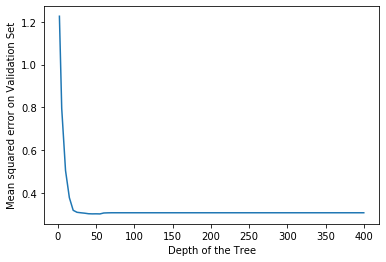

In [50]:
# Plotting the validation curve for max depth; The MSE stabilizes at around 30 
plt.plot(m_depth, mse)
plt.xlabel("Depth of the Tree")
plt.ylabel("Mean squared error on Validation Set")

In [50]:
# Training the entire training + val with 30 as max depth 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators= 100, max_features= 'sqrt', max_depth= 30, random_state= 67)
rf.fit(x_train_val, np.ravel(y_train_val))
lr_train_score = rf.score(x_train_val,np.ravel(y_train_val))
lr_test_score = rf.score(x_test,np.ravel(y_test))


0.3170076464968801

In [98]:
print(f"The MSE on the test set is: {mean_squared_error(y_test, rf.predict(x_test))}")

The MSE on the test set is: 0.3170076464968801


In [99]:
# R squared on the test set
print(f"The R- Squared on the test set is: {lr_test_score}")

The R- Squared on the test set is: 0.8945938903141976


Text(0, 0.5, 'Features')

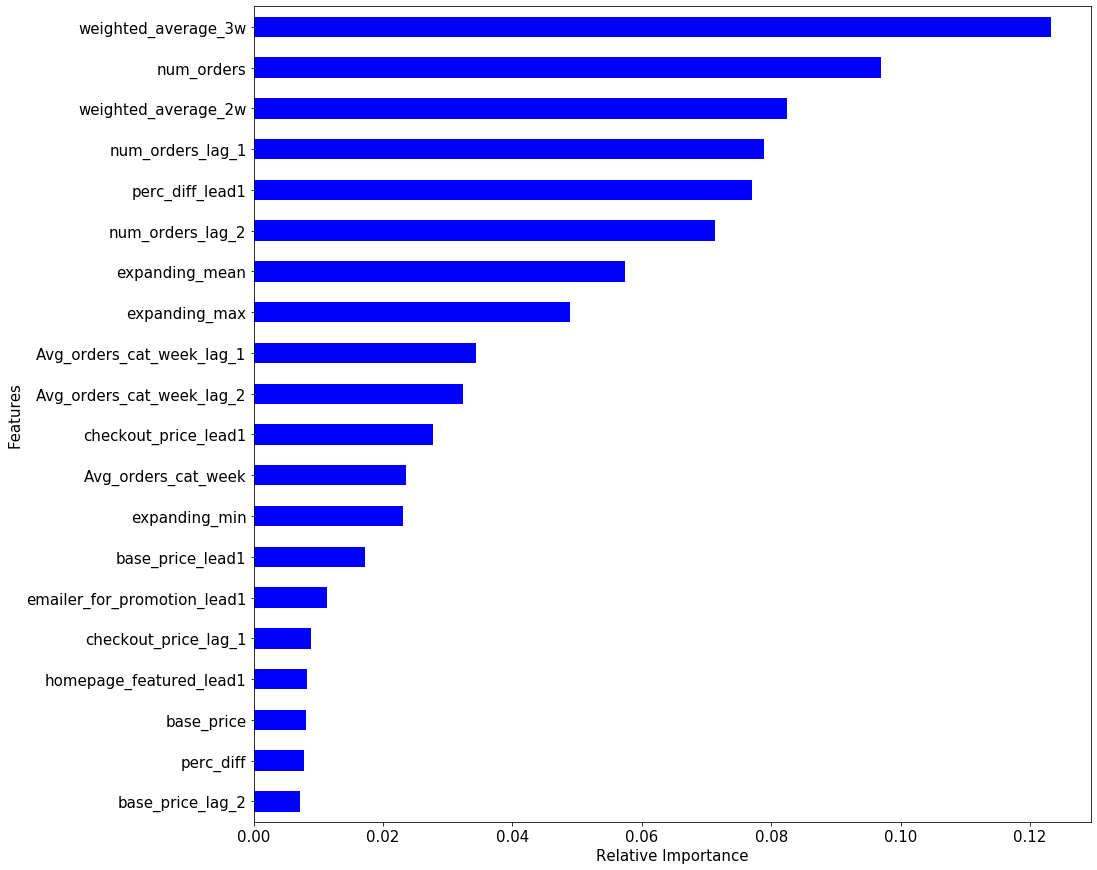

In [96]:
# Feature importance
feat_importances = pd.Series(rf.feature_importances_, index=x_train_val.columns)
ax = feat_importances.sort_values(ascending= True)[-20:].plot(kind='barh', color = 'blue', figsize = (15,15), fontsize = 15)
ax.set_xlabel("Relative Importance", fontsize = 15)
ax.set_ylabel("Features", fontsize = 15)



### Getting the Predictions

In [107]:
test_data_elastic_dec = test_data.copy(deep = True)

# Decreasing the base price by 25% to see how it affects demand
test_data_elastic_dec['checkout_price_lead1'] = test_data_elastic_dec['checkout_price_lead1'] + np.log(0.5)
test_data_elastic_dec.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,perc_diff,checkout_price/avg_checkout price for per week per city_code,...,695_77,698_23,699_85,700_56,702_35,703_56,713_85,TYPE_A,TYPE_B,TYPE_C
week,,,,,,,,,,,,,,,,,,,,,
144,10,1062,5.257964,5.263156,0,0,6.852243,6.3,-0.098655,0.917532,...,0,0,0,0,0,0,0,0,1,0
144,11,1062,5.200815,5.211779,0,0,6.682109,3.7,-0.210366,0.909594,...,0,0,0,0,0,0,0,1,0,0
144,13,1062,5.263156,5.257964,0,0,7.126087,6.7,0.098753,0.918439,...,0,0,0,0,0,0,0,0,1,0
144,14,1062,5.253215,5.253215,0,0,6.104793,2.7,0.000000,0.919694,...,0,0,0,0,0,0,0,0,0,1
144,17,1062,5.273307,5.268167,0,0,6.006353,3.2,0.097564,0.921575,...,0,0,0,0,0,0,0,1,0,0


In [108]:
test_data_elastic_inc = test_data.copy(deep = True)

# Increasing the base price by 25% to see how it affects demand
test_data_elastic_inc['checkout_price_lead1'] = test_data_elastic_inc['checkout_price_lead1'] + np.log(1.25)
test_data_elastic_inc.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,perc_diff,checkout_price/avg_checkout price for per week per city_code,...,695_77,698_23,699_85,700_56,702_35,703_56,713_85,TYPE_A,TYPE_B,TYPE_C
week,,,,,,,,,,,,,,,,,,,,,
144,10,1062,5.257964,5.263156,0,0,6.852243,6.3,-0.098655,0.917532,...,0,0,0,0,0,0,0,0,1,0
144,11,1062,5.200815,5.211779,0,0,6.682109,3.7,-0.210366,0.909594,...,0,0,0,0,0,0,0,1,0,0
144,13,1062,5.263156,5.257964,0,0,7.126087,6.7,0.098753,0.918439,...,0,0,0,0,0,0,0,0,1,0
144,14,1062,5.253215,5.253215,0,0,6.104793,2.7,0.000000,0.919694,...,0,0,0,0,0,0,0,0,0,1
144,17,1062,5.273307,5.268167,0,0,6.006353,3.2,0.097564,0.921575,...,0,0,0,0,0,0,0,1,0,0


In [109]:
# Getting the features and labels for decreased price
x_test_el_dec = test_data_elastic_dec[features]
y_test_el_dec = test_data_elastic_dec[label]

# Getting the features and label for increased price
x_test_el_inc = test_data_elastic_inc[features]
y_test_el_inc = test_data_elastic_inc[label]

# Actual predictions with no change in price
x_test = test_data[features]
y_test = test_data[label]

# Making predictions for decreased price with pre-trained model
test_data['prediction_bprice_dec50%'] = rf.predict(x_test_el_dec)

# Making predictions for increased price with pre-trained model
test_data['prediction_bprice_inc25%'] = rf.predict(x_test_el_inc)

# Making predictions for original price
test_data['prediction_nochange'] = rf.predict(x_test)

In [110]:
# Converting back to normal scale, intially they were in log scale
test_data['target_lead'] = np.expm1(test_data['target_lead'])
test_data['prediction_bprice_inc25%'] = np.expm1(test_data['prediction_bprice_inc25%'])
test_data['prediction_bprice_dec50%'] = np.expm1(test_data['prediction_bprice_dec50%'])
test_data['prediction_nochange'] = np.expm1(test_data['prediction_nochange'])

test_data[['prediction_bprice_inc25%', 'target_lead', 'prediction_bprice_dec50%', 'prediction_nochange' ]].head()

,prediction_bprice_inc25%,target_lead,prediction_bprice_dec50%,prediction_nochange
week,,,,
144,922.829761,958.0,938.076041,939.147167
144,728.407941,728.0,741.625913,730.933985
144,1067.941829,810.0,1067.661246,1082.640736
144,326.215067,231.0,347.376151,346.134583
144,389.136901,270.0,408.847169,400.876181


In [134]:
# Decrease in demand 
print(f"Change in demand whith increase in cost by 25%: {sum(test_data['prediction_bprice_inc25%']) - sum(test_data['prediction_nochange'])}")

Change in demand whith increase in cost by 25%: -39087.57551202434


In [135]:
# Increase in demand 
print(f"Change in demand whith decrease in cost by 50%: {sum(test_data['prediction_bprice_dec50%']) - sum(test_data['prediction_nochange'])}")

Change in demand whith decrease in cost by 50%: 40524.679387488985


### Getting the Baseline prediction 


In [140]:
# Taking weeks from 1 to 144
base_data = main_data[main_data['week'] <= 144]

# Average orders in each meal_id, center_id combination 
orders_avg= base_data.groupby(['meal_id', 'center_id'])['num_orders'].mean().reset_index()

# Renaming the columns 
orders_avg.columns= ['meal_id', 'center_id', 'baseline_pred']

In [141]:
# Merging the test data and baseline predcitions 
merge = pd.merge(test_data, orders_avg, how = 'inner', 
                 left_on = ['meal_id', 'center_id'], right_on = ['meal_id', 'center_id'])
merge['baseline_pred'] = np.expm1(merge['baseline_pred'])
merge.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,perc_diff,checkout_price/avg_checkout price for per week per city_code,...,702_35,703_56,713_85,TYPE_A,TYPE_B,TYPE_C,prediction_bprice_dec50%,prediction_bprice_inc25%,prediction_nochange,baseline_pred
0,10,1062,5.257964,5.263156,0,0,6.852243,6.3,-0.098655,0.917532,...,0,0,0,0,1,0,938.076041,922.829761,939.147167,909.294733
1,11,1062,5.200815,5.211779,0,0,6.682109,3.7,-0.210366,0.909594,...,0,0,0,1,0,0,741.625913,728.407941,730.933985,795.725722
2,13,1062,5.263156,5.257964,0,0,7.126087,6.7,0.098753,0.918439,...,0,0,0,0,1,0,1067.661246,1067.941829,1082.640736,1055.101674
3,14,1062,5.253215,5.253215,0,0,6.104793,2.7,0.000000,0.919694,...,0,0,0,0,0,1,347.376151,326.215067,346.134583,264.764452
4,17,1062,5.273307,5.268167,0,0,6.006353,3.2,0.097564,0.921575,...,0,0,0,1,0,0,408.847169,389.136901,400.876181,344.472230


In [142]:
print(f"MSE of our model: {mean_squared_error(merge['prediction_nochange'],merge['target_lead'])}")
print(f"MSE of baseline: {mean_squared_error(merge['baseline_pred'],merge['target_lead'])}")

MSE of our model: 10644.759411564397
MSE of baseline: 22361.340811381786


In [143]:
# Cnverting price columns back to normal scale
merge['checkout_price_lead1'] = np.expm1(merge['checkout_price_lead1'])
merge['base_price_lead1'] = np.expm1(merge['base_price_lead1'])

In [144]:
# Capturing the baseline loss here
merge['baseline_diff']=merge['target_lead']- merge['baseline_pred']

def conditions(row, col):
    if row[col] > 0 :
        return 'order loss'
    elif row[col] == 0 :
        return 'accurate'
    else:
         return 'inventory loss'
        
merge['baseline_loss'] = merge.apply (lambda row: conditions(row, 'baseline_diff'), axis=1)

In [145]:
# Subsetting the data to derive the business value
cols_to_keep = ['week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 
                'emailer_for_promotion', 'homepage_featured', 'num_orders', 'op_area',
                'target_lead', 'prediction_nochange', 'baseline_pred', 'baseline_diff',
                'baseline_loss', 'checkout_price_lead1', 'base_price_lead1',
                'prediction_bprice_inc25%', 'prediction_bprice_dec50%']
sub_data_biz = merge[cols_to_keep]

sub_data_biz.rename(columns ={'target_lead': 'Actual_Forecast',
                              'prediction_nochange': 'Model_Forecast', 
                              'baseline_pred': 'Baseline_Forecast'}, inplace = True)

In [146]:
# Getting the loss that our model gives
sub_data_biz['forecast_diff']=sub_data_biz['Actual_Forecast']- sub_data_biz['Model_Forecast']

sub_data_biz['forecast_loss'] = sub_data_biz.apply (lambda row: conditions(row, 'forecast_diff'), axis=1)

### Assumption:
#### The cost of each order = inventory cost (0.6) + profit (0.1) + overhead (0.3)
#### Edibta score 10% of revenue   
#### Cosidering each meal is 5 dollars, inventory cost = 3 dollars, profit = 0.5 dollars, overhead = 1.5 dollars

In [147]:
# Converting price to dollars, was in ruppees before 
sub_data_biz['base_price_lead1']=sub_data_biz['base_price_lead1']/70
sub_data_biz['checkout_price_lead1']=sub_data_biz['checkout_price_lead1']/70

In [148]:
# Computing the loss in dollars for baseline model based on the above assumption
def final_pop(row):
    if row['baseline_loss'] == 'order loss':
        return (row['baseline_diff']*0.1*row['checkout_price_lead1'])
    else:
        return np.abs(row['baseline_diff']*0.6*row['checkout_price_lead1'])

sub_data_biz['Monetoryloss_baseline']= sub_data_biz.apply(final_pop, axis = 1)

print(f"The baseline loss is: {sub_data_biz['Monetoryloss_baseline'].sum()}")

The baseline loss is: 386015.91405965795


In [149]:
# Computing the loss in dollars for random forest model based on the above assumption
def final_pop(row):
    if row['forecast_loss'] == 'order loss':
        return (row['forecast_diff']*0.1*row['checkout_price_lead1'])
    else:
        return np.abs(row['forecast_diff']*0.6*row['checkout_price_lead1'])
    
sub_data_biz['Monetoryloss_forecast']= sub_data_biz.apply(final_pop, axis = 1)

print(f"The forecasted loss is: {sub_data_biz['Monetoryloss_forecast'].sum()}")

The forecasted loss is: 279384.72647753626


In [150]:
# Dollar value saved
print(f"Our model saves about: {sub_data_biz['Monetoryloss_baseline'].sum() - sub_data_biz['Monetoryloss_forecast'].sum()} dollars")

Our model saves about: 106631.1875821217 dollars
